# 의사결정나무
- 장점: 표준화, 정규화 필요 없음

### 문제 정의
서울 지역(구)의 경도와 위도 정보를 사용하여
임의로 입력된 지역(동)을 강동, 강서, 강남, 강북으로 분류하는 예제

In [2]:
import pandas as pd

In [3]:
train_df = pd.read_csv('data/seoul_district.csv')
train_df.head()

,district,longitude,latitude,label
0,강서구,126.849500,37.551000,강서
1,양천구,126.855396,37.524240,강서
2,구로구,126.887400,37.495400,강서
3,금천구,126.902000,37.451900,강서
4,마포구,126.908728,37.560229,강서


In [4]:
test_df = pd.read_csv('data/seoul_dong.csv')
test_df.head()

,dong,longitude,latitude,label
0,개봉동,126.854547,37.489853,강서
1,고척동,126.859245,37.501394,강서
2,화곡동,126.847951,37.537759,강서
3,방화동,126.815719,37.575817,강서
4,상암동,126.891620,37.577039,강서


In [5]:
# 레이블 갯수 확인
print(train_df['label'].value_counts())
print(test_df.label.value_counts())

강서    5
강남    5
강북    5
강동    5
Name: label, dtype: int64
강서    5
강남    5
강북    5
강동    5
Name: label, dtype: int64


/Users/tj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


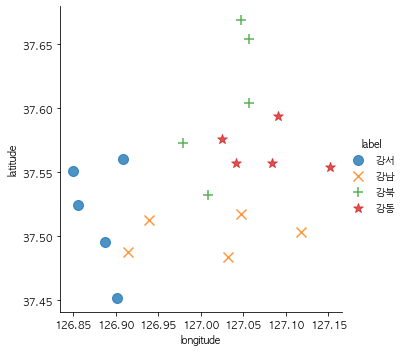

In [6]:
# import sns
import matplotlib.pyplot as plt
import seaborn as sns

# AppleGothic
plt.rcParams['font.family'] = 'AppleGothic'

sns.lmplot(
  'longitude',
  'latitude',
  data=train_df,
  hue='label',
  markers=['o','x','+','*'],
  fit_reg=False,
  scatter_kws={'s':100},
)

### 데이터 다듬기
- train_df에서 district 제거
- test_df 동 제거

In [7]:
train_df = train_df.iloc[:,1:4]

In [8]:
test_df = test_df.iloc[:,1:4]

In [9]:
X_train = train_df.iloc[:,0:2]
y_train = train_df.label
X_test = test_df.iloc[:,0:2]
y_test = test_df.label

In [12]:
# 학습시키기
from sklearn.tree import DecisionTreeClassifier

# random_state = 35
model = DecisionTreeClassifier(random_state=35)

# 학습하기
model.fit(X_train, y_train)
pred = model.predict(X_test)

# 예측값과 테스트용 라벨을 비교하여 정확도 계산하기
from sklearn.metrics import accuracy_score
print('정확도:', accuracy_score(y_test, pred))


정확도: 0.95


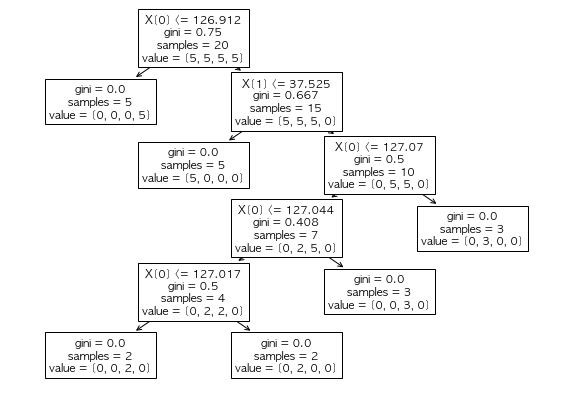

In [13]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(model)
plt.show()

##### gini: 불순도